In [2]:
from astropy import coordinates as coords
from astropy import time
import astropy.units as u
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors 
import dunestyle.matplotlib as dunestyle
import ROOT

/home/leoperes/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


DUNE plot style enabled


Here are DUNE FD values:

FD1 (NE): 1417.62 m, 3986.75 mwe; 103.7546341 W, 44.3459914 N

FD2 (SE): 1392.17 m, 3866.89 mwe; 103.7548042 W, 44.3450261 N

FD3 (NW): 1405.13 m, 3942.87 mwe; 103.7556732 W, 44.3460857 N

FD4 (SW): 1404.21 m, 3885.87 mwe; 103.7558433 W, 44.3451204 N

The highest point of the detector caverns is 126.62 m (415.42 ft) above sea level.

In [3]:

FluxRotValues = np.array([[+0.9877, -0.1564, +0.0000],  # new x axis in old coordinates: be nice and fix things (ends up the same)
                        [+0.0000, +0.0000, +1.0000],  # new y axis in old coordinates: vertical
                        [-0.1564, -0.9877, +0.0000]])   # new z axis in old coordinates: away from Batavia, IL

In [4]:

# Define observer's location
observer_location = coords.EarthLocation(lat=44.34 * u.deg, lon=-103.75 * u.deg, height= 100 * u.m)

# Define the Galactic coordinates
galactic_coords = coords.SkyCoord(l=0 * u.deg, b=0* u.deg, frame='galactic')

# Define the time range
current_time = time.Time.now() + 10 * u.year # 10 years from now
end_time = current_time + 1 * u.year  # 20 years from now
#test_oneday =current_time + 0.5 * u.day
times = time.Time(np.linspace(current_time.jd, end_time.jd, 2000), format='jd')  # 200,000 time points


# Prepare to store results
data_honda = []
data_det = []
data_check = []

# Loop over all the times to calculate directions
for t in times:
    # Convert Galactic coordinates to ICRS
    icrs_coords = galactic_coords.transform_to(coords.ICRS)

    # Convert ICRS coordinates to AltAz (topocentric horizontal) at each time
    altaz_coords = icrs_coords.transform_to(coords.AltAz(obstime=t, location=observer_location))

    # Convert AltAz coordinates to Cartesian (custom direction system)
    alt = altaz_coords.alt.to(u.rad).value  # Altitude in radians
    az = altaz_coords.az.to(u.rad).value    # Azimuth in radians


    #z is orthogonal to earth surface pointing to the zenith, x points toward south and y toward east 
    # Calculate Cartesian coordinates where:
    # x-axis points towards geographic south
    # y-axis points towards geographic east
    # z-axis points towards zenith
    x = np.sin(az) * np.cos(alt)
    y = np.cos(az) * np.cos(alt)
    z = np.sin(alt)
    
    arr = np.array([x,y,z])
    
    arr_det = FluxRotValues.dot(arr)
    
    # Append the results
    data_check.append([t.iso,alt, az])

    data_honda.append([t.iso, x, y, z, math.atan2(y, x), math.acos(z)])
    
    data_det.append([t.iso, arr_det[0], arr_det[1], arr_det[2], math.atan2(arr_det[1], arr_det[0]), math.acos(arr_det[2])])

# Save the data to a CSV file
df_Honda = pd.DataFrame(data_honda, columns=['Time', 'X (South)', 'Y (East)', 'Z (Zenith)', 'Phi (Honda)', 'Theta (Honda)'])
df_Honda.to_csv('HondaCoordSys_directions_over_10_years.csv', index=False)

# Save the data to a CSV file
df_Detector = pd.DataFrame(data_det, columns=['Time', 'X (RightHanded)', 'Y (Zenith)', 'Z (Beam Direction)', 'Phi (Detector)', 'Theta (Detector)'])
df_Detector.to_csv('DetectorCoordSys_directions_over_10_years.csv', index=False)

# Save the data to a CSV file
df_Check = pd.DataFrame(data_check, columns=['Time', 'Alt (Altitude)', 'Az (Azimuth)'])
df_Check.to_csv('altaz_coords_directions_over_10_years.csv', index=False)

/home/leoperes/.local/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/leoperes/.local/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/leoperes/.local/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/leoperes/.local/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


In [5]:
df_Detector

,Time,X (RightHanded),Y (Zenith),Z (Beam Direction),Phi (Detector),Theta (Detector)
0,2035-04-26 09:54:25.192,0.267303,0.281713,0.921520,0.811640,0.398821
1,2035-04-26 14:17:31.885,-0.628949,-0.007368,0.777420,-3.129878,0.680243
2,2035-04-26 18:40:38.578,-0.715617,-0.688608,0.117120,-2.375426,1.453407
3,2035-04-26 23:03:45.272,0.110016,-0.954609,-0.276801,-1.456056,1.851260
4,2035-04-27 03:26:51.965,0.869420,-0.490111,0.062527,-0.513318,1.508229
...,...,...,...,...,...,...
1995,2036-04-24 22:21:58.418,-0.067327,-0.963840,-0.257837,-1.640536,1.831579
1996,2036-04-25 02:45:05.112,0.791021,-0.610220,-0.043880,-0.657078,1.614691
1997,2036-04-25 07:08:11.805,0.776024,0.065724,0.627279,0.084492,0.892742
1998,2036-04-25 11:31:18.498,-0.094543,0.262874,0.960193,1.916042,0.283105


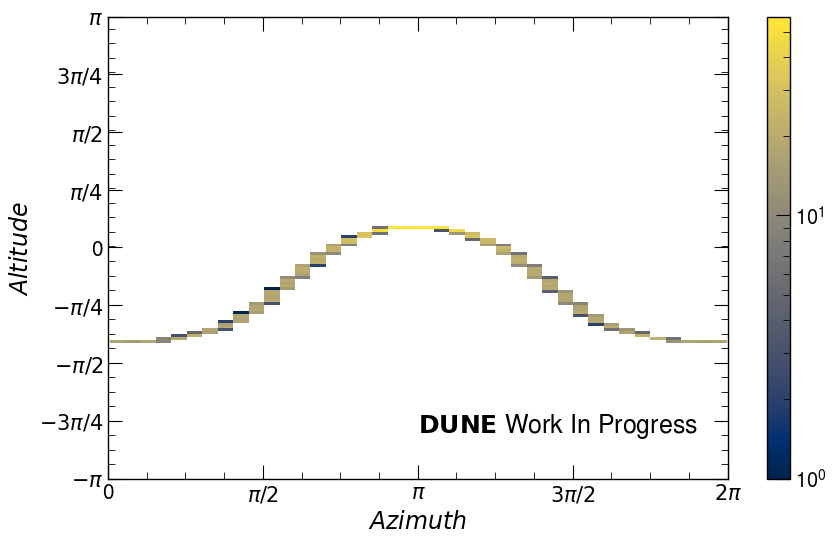

In [6]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))

h = ax.hist2d(df_Check.iloc[:,2], df_Check.iloc[:,1], bins = (40,40),  norm = colors.LogNorm(), label = ' GC Position')
ax.set_ylabel(r'$Altitude$', fontsize = 17)
ax.set_xlabel(r'$Azimuth$', fontsize = 17)
ax.set_xticks([0.0,1.570,3.14159,4.7123,6.283])
ax.set_xticklabels([0,r'$\pi / 2$', r'$\pi$',r'$3\pi/2$', r'$2\pi$'], fontsize = 15)
ax.set_yticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
dunestyle.WIP(x=0.5, y=0.10)
ax.set_yticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
fig.colorbar(h[3], ax=ax)
plt.show()

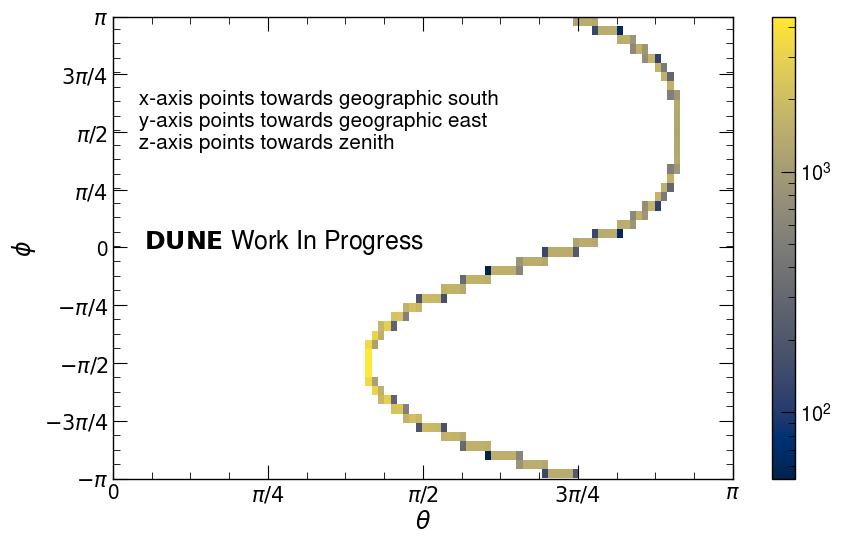

In [6]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))


h = ax.hist2d(df_Honda.iloc[:,5], df_Honda.iloc[:,4], bins = (50,50),  norm = colors.LogNorm(), label = ' GC Position')

ax.text(0.1,1.356," x-axis points towards geographic south\n y-axis points towards geographic east\n z-axis points towards zenith", fontsize=15)
ax.set_xlabel(r'$\theta$', fontsize = 17)
ax.set_ylabel(r'$\phi$', fontsize = 17)
ax.set_xticks([0.0,0.78539,1.570,2.356,3.14159])
ax.set_xticklabels([0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
ax.set_yticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
ax.set_yticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
fig.colorbar(h[3], ax=ax)
dunestyle.WIP(x=0.05, y=0.50)
plt.show()

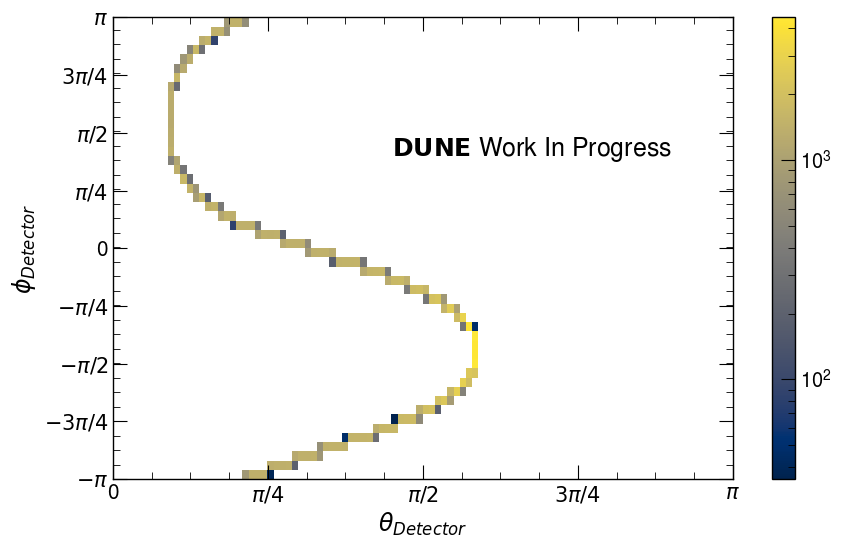

In [7]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))

h = ax.hist2d(df_Detector.iloc[:,5], df_Detector.iloc[:,4], bins = (50,50),  norm = colors.LogNorm(), label = ' GC Position')
ax.set_xlabel(r'$\theta_{Detector}$', fontsize = 17)
ax.set_ylabel(r'$\phi_{Detector}$', fontsize = 17)
ax.set_xticks([0.0,0.78539,1.570,2.356,3.14159])
ax.set_xticklabels([0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
ax.set_yticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
ax.set_yticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
dunestyle.WIP(x=0.45, y=0.70)
fig.colorbar(h[3], ax=ax)
plt.show()

/home/leoperes/.local/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/leoperes/.local/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/leoperes/.local/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


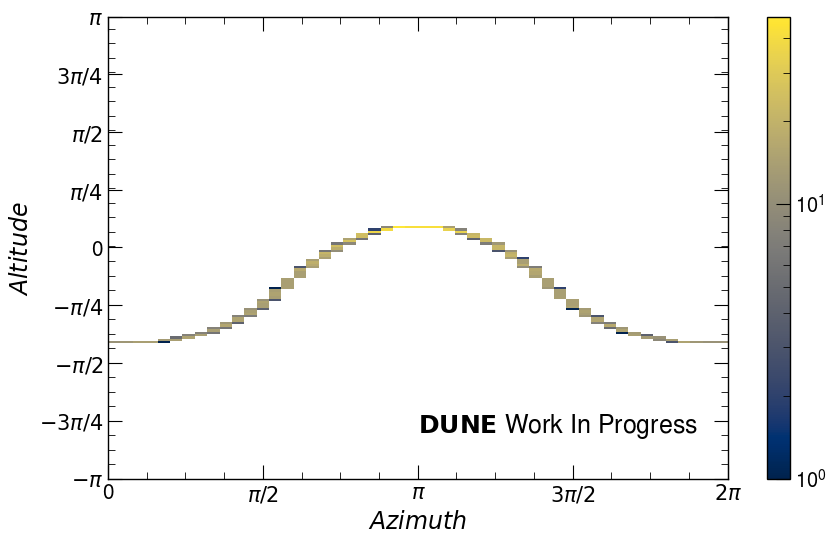

In [10]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy import time
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

# Define the location (latitude and longitude)
latitude = 44.3459914  # North
longitude = -103.7546341  # West
location = EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg)

# Define the Galactic Center coordinates (RA and Dec)
galactic_center = SkyCoord(ra=266.405 * u.deg, dec=-29.0078 * u.deg, frame='icrs')

# Define the time range
current_time = time.Time.now() + 10 * u.year # 10 years from now
end_time = current_time +  10 * u.year  # 20 years from now
times = time.Time(np.linspace(current_time.jd, end_time.jd, 2000), format='jd')  # 100,000 time points

# Define the time range (next 10 years, at midnight on January 1st of each year)
#start_year = 2023
#end_year = 2033
#times = Time([f'{year}-01-01 00:00:00' for year in range(start_year, end_year + 1)])

# Lists to store altitude and azimuth values
altitudes = []
azimuths = []

# Calculate the altitude and azimuth for each time
for time in times:
    # Convert to AltAz frame for the observer's location
    altaz_frame = AltAz(obstime=time, location=location)
    galactic_center_altaz = galactic_center.transform_to(altaz_frame)
    
    # Extract altitude and azimuth
    altitude = galactic_center_altaz.alt.rad
    azimuth = galactic_center_altaz.az.rad
    
    # Store values
    altitudes.append(altitude)
    azimuths.append(azimuth)

# Plot the 2D histogram
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))

h = ax.hist2d(azimuths, altitudes, bins=(50, 50), norm = colors.LogNorm(), label = ' GC Position')
ax.set_ylabel(r'$Altitude$', fontsize = 17)
ax.set_xlabel(r'$Azimuth$', fontsize = 17)
ax.set_xticks([0.0,1.570,3.14159,4.7123,6.283])
ax.set_xticklabels([0,r'$\pi / 2$', r'$\pi$',r'$3\pi/2$', r'$2\pi$'], fontsize = 15)
ax.set_yticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
dunestyle.WIP(x=0.5, y=0.10)
ax.set_yticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
fig.colorbar(h[3], ax=ax)
#plt.title('Position of the Galactic Center (2023-2033)')
plt.show()

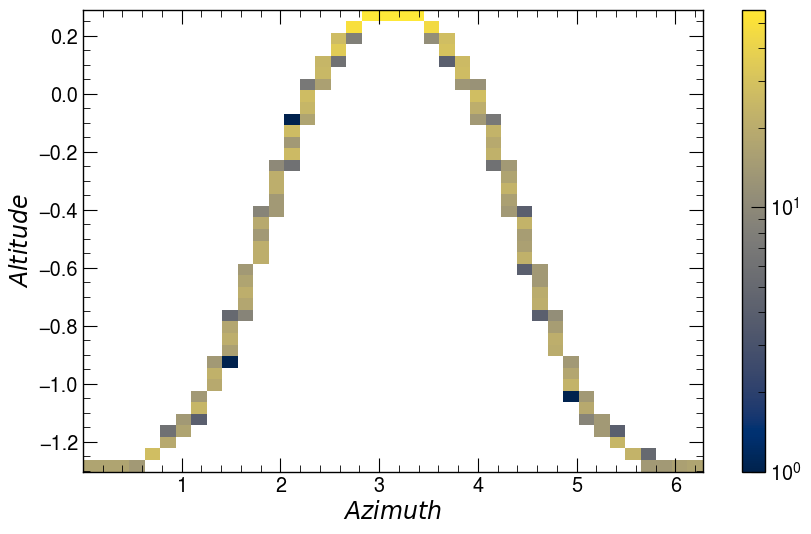

In [12]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))

h = ax.hist2d(azimuths, altitudes, bins = (40,40),  norm = colors.LogNorm(), label = ' GC Position')
ax.set_ylabel(r'$Altitude$', fontsize = 17)
ax.set_xlabel(r'$Azimuth$', fontsize = 17)
#ax.set_xticks([0.0,1.570,3.14159,4.7123,6.283])
#ax.set_xticklabels([0,r'$\pi / 2$', r'$\pi$',r'$3\pi/2$', r'$2\pi$'], fontsize = 15)
#ax.set_yticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
#ax.set_yticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
fig.colorbar(h[3], ax=ax)
plt.show()

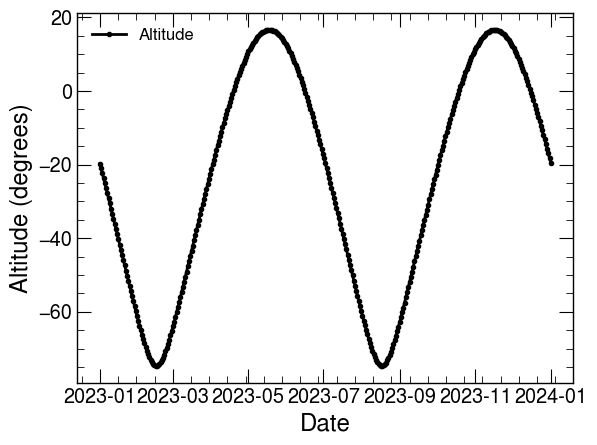

In [ ]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

# Define the location (latitude and longitude)
latitude = 44.3459914  # North
longitude = -103.7546341  # West
location = EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg)

# Define the Galactic Center coordinates (RA and Dec)
galactic_center = SkyCoord(ra=266.405 * u.deg, dec=-29.0078 * u.deg, frame='icrs')

# Define the time range (1 year, 365 points at midnight)
start_time = Time('2023-01-01 00:00:00')
end_time = Time('2024-01-01 00:00:00')
times = start_time + (end_time - start_time) * np.linspace(0, 1, 365)

# Lists to store altitude and azimuth values
altitudes = []
azimuths = []

# Calculate the altitude and azimuth for each time
for time in times:
    # Convert to AltAz frame for the observer's location
    altaz_frame = AltAz(obstime=time, location=location)
    galactic_center_altaz = galactic_center.transform_to(altaz_frame)
    
    # Extract altitude and azimuth
    altitude = galactic_center_altaz.alt.deg
    azimuth = galactic_center_altaz.az.deg
    
    # Store values
    altitudes.append(altitude)
    azimuths.append(azimuth)

# Plot the altitude over the year


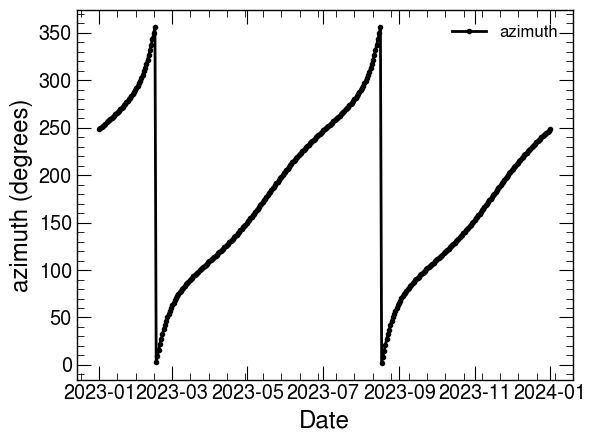

In [14]:
plt.plot(times.datetime, azimuths, label='azimuth', marker ='.')
plt.xlabel('Date')
plt.ylabel('azimuth (degrees)')
#plt.title('Galactic Center Altitude at Midnight (2023)')
plt.legend()
plt.show()

In [ ]:
plt.plot(times.datetime, altitudes, label='Altitude', marker ='.')
plt.xlabel('Date')
plt.ylabel('Altitude (degrees)')
#plt.title('Galactic Center Altitude at Midnight (2023)')
plt.legend()
plt.show()

/home/leoperes/.local/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/leoperes/.local/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 801 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


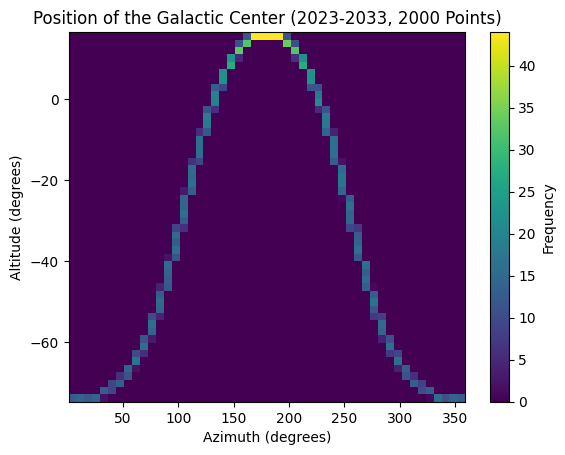

In [31]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

# Define the location (latitude and longitude)
latitude = 44.3459914  # North
longitude = -103.7546341  # West
location = EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg)

# Define the Galactic Center coordinates (RA and Dec)
galactic_center = SkyCoord(ra=266.405 * u.deg, dec=-29.0078 * u.deg, frame='icrs')

# Define the time range (next 10 years, 2000 points evenly distributed)
start_time = Time('2023-01-01 00:00:00')
end_time = Time('2033-01-01 00:00:00')
times = start_time + (end_time - start_time) * np.linspace(0, 1, 2000)

# Lists to store altitude and azimuth values
altitudes = []
azimuths = []

# Calculate the altitude and azimuth for each time
for time in times:
    # Convert to AltAz frame for the observer's location
    altaz_frame = AltAz(obstime=time, location=location)
    galactic_center_altaz = galactic_center.transform_to(altaz_frame)
    
    # Extract altitude and azimuth
    altitude = galactic_center_altaz.alt.deg
    azimuth = galactic_center_altaz.az.deg
    
    # Store values
    altitudes.append(altitude)
    azimuths.append(azimuth)

# Plot the 2D histogram
plt.hist2d(azimuths, altitudes, bins=(50, 50), cmap='viridis')
plt.colorbar(label='Frequency')
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Altitude (degrees)')
plt.title('Position of the Galactic Center (2023-2033, 2000 Points)')
plt.show()